<a href="https://colab.research.google.com/github/gopikaraj/pose-estimation-detection/blob/master/Motion_Capture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip2 install torch==0.3.1

     |████████████████████████████████| 496.9MB 25kB/s 
ERROR: torchvision 0.5.0 has requirement torch==1.4.0, but you'll have torch 0.3.1 which is incompatible.
  Found existing installation: torch 1.4.0
    Uninstalling torch-1.4.0:
      Successfully uninstalled torch-1.4.0


In [3]:
!pip2 install  tensorflow==1.3.0

  Using cached https://files.pythonhosted.org/packages/fe/dd/8764ae59e8ff74421d615ddb9c86a1b404c27708dfde3caa8f17c183788d/tensorflow-1.3.0-cp27-cp27mu-manylinux1_x86_64.whl
ERROR: magenta 0.3.19 has requirement tensorflow>=1.12.0, but you'll have tensorflow 1.3.0 which is incompatible.
  Found existing installation: tensorflow 1.15.2
    Uninstalling tensorflow-1.15.2:
      Successfully uninstalled tensorflow-1.15.2


In [ ]:
!pip2 show tensorflow

Name: tensorflow
Version: 1.3.0
Summary: TensorFlow helps the tensors flow
Home-page: http://tensorflow.org/
Author: Google Inc.
Author-email: opensource@google.com
License: Apache 2.0
Location: /usr/local/lib/python2.7/dist-packages
Requires: numpy, mock, protobuf, wheel, backports.weakref, six, tensorflow-tensorboard
Required-by: magenta, fancyimpute


In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))


In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()


In [2]:
!git clone https://github.com/Dene33/keras_Realtime_Multi-Person_Pose_Estimation.git
!pip install configobj
!apt install ffmpeg
!apt-get install blender

!apt install python2.7 python-pip
!git clone https://github.com/Dene33/hmr.git
!wget https://people.eecs.berkeley.edu/~kanazawa/cachedir/hmr/models.tar.gz && tar -xf models.tar.gz
!mv models hmr/
!pip2 install -r hmr/requirements.txt
!pip2 install ipdb
!pip2 install deepdish

!mkdir hmr/output
!mkdir hmr/output/csv
!mkdir hmr/output/images
!mkdir hmr/output/csv_joined
!mkdir hmr/output/bvh_animation
!mkdir hmr/tf_datasets/
%tensorflow_version 1.x
import logging

# get TF logger
log = logging.getLogger('tensorflow')
log.setLevel(logging.DEBUG)  

import os
os.chdir('keras_Realtime_Multi-Person_Pose_Estimation')
!bash model/get_keras_model.sh
!mkdir sample_jsons
!mkdir sample_videos
!mkdir sample_images

exec(open('model_load.py').read())
!pip2 install opendr==0.77

Cloning into 'keras_Realtime_Multi-Person_Pose_Estimation'...
remote: Enumerating objects: 196, done.
remote: Total 196 (delta 0), reused 0 (delta 0), pack-reused 196
Receiving objects: 100% (196/196), 29.49 MiB | 13.66 MiB/s, done.
Resolving deltas: 100% (80/80), done.
  Created wheel for configobj: filename=configobj-5.0.6-cp27-none-any.whl size=34547 sha256=b4f9dc43dfd2d416a09cf1f66c0ba5c5f122f4cd02ddd7d12e58995d8b0d64b2
  Stored in directory: /root/.cache/pip/wheels/f1/e4/16/4981ca97c2d65106b49861e0b35e2660695be7219a2d351ee0
Successfully built configobj
Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state inform

Using TensorFlow backend.
W0804 06:26:11.234420 140008173320064 deprecation.py:506] From /tensorflow-1.15.2/python2.7/tensorflow_core/python/ops/resource_variable_ops.py:1630: calling __init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
W0804 06:26:11.275234 140008173320064 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:4070: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



     |████████████████████████████████| 245kB 6.2MB/s 
  Created wheel for opendr: filename=opendr-0.77-cp27-cp27mu-linux_x86_64.whl size=6629033 sha256=ee3dbabd305916a6cc1d39abdd0ba19d8dc885856d7beda4513bcb4e1b30db30
  Stored in directory: /root/.cache/pip/wheels/5c/cd/7c/8f4035d040aacef26bccc11cebfe69cc44871e020b1f5e598b
Successfully built opendr


##Upload video

In [4]:
#upload video
import os
exec(open('upload_videos.py').read())

Saving dance.mp4 to dance.mp4
User uploaded file "dance.mp4" with length 3361475 bytes


##Process the video
####<font color='green'>`24`</font> in `video_to_images.sh` stands for desired fps rate at which you want to convert video to images

In [ ]:
%cd ..

In [ ]:
#
%cd /content/keras_Realtime_Multi-Person_Pose_Estimation/

/content/keras_Realtime_Multi-Person_Pose_Estimation


In [5]:
#convert to images, specify fps rate
!bash video_to_images.sh 20
import os
#2d pose estimation. For each image creates corresponding .json file with format
#similar to output .json format of openpose (https://github.com/CMU-Perceptual-Computing-Lab/openpose)
print("2d Estimation")
exec(open('2d_pose_estimation.py').read())

print("3d Estmation")
#3d pose estimation
os.chdir('..')
!bash hmr/3dpose_estimate.sh

#convert estimated .csv files to bvh
!blender --background hmr/csv_to_bvh.blend -noaudio -P hmr/csv_to_bvh.py

Processing dance
ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-lib

W0804 06:31:07.345741 140008173320064 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



Input shape: (1, 184, 328, 3)
Output shape (heatmap): (1, 23, 41, 19)
Input shape: (1, 368, 656, 3)
Output shape (heatmap): (1, 46, 82, 19)
Input shape: (1, 552, 984, 3)
Output shape (heatmap): (1, 69, 123, 19)
Input shape: (1, 736, 1312, 3)
Output shape (heatmap): (1, 92, 164, 19)
('Now proccessing:', 'dance058.png')
Input shape: (1, 184, 328, 3)
Output shape (heatmap): (1, 23, 41, 19)
Input shape: (1, 368, 656, 3)
Output shape (heatmap): (1, 46, 82, 19)
Input shape: (1, 552, 984, 3)
Output shape (heatmap): (1, 69, 123, 19)
Input shape: (1, 736, 1312, 3)
Output shape (heatmap): (1, 92, 164, 19)
('Now proccessing:', 'dance025.png')
Input shape: (1, 184, 328, 3)
Output shape (heatmap): (1, 23, 41, 19)
Input shape: (1, 368, 656, 3)
Output shape (heatmap): (1, 46, 82, 19)
Input shape: (1, 552, 984, 3)
Output shape (heatmap): (1, 69, 123, 19)
Input shape: (1, 736, 1312, 3)
Output shape (heatmap): (1, 92, 164, 19)
('Now proccessing:', 'dance038.png')
Input shape: (1, 184, 328, 3)
Output sha

## Add code to the src/config


```
import tensorflow as tf
from absl import logging
line 60 log_dir change to logdir
comment line 194 sort() in hmr/demo.py

```
## Add to 3d pose_estimate.sh


```
python2 hmr/evaluate_h36m.py --batch_size=500 --load_path=hmr/models/model.ckpt-667589

#modify evaluate_h36m.py
from src.config import get_config
from src.util import renderer as vis_util
from src.RunModel import RunModel
from src.benchmark.eval_util import compute_errors
from src.benchmark.datasets.common import read_images_from_tfrecords
```





In [ ]:
!zip -r /content/train1.zip /content/hmr/output/images

  adding: content/hmr/output/images/ (stored 0%)
  adding: content/hmr/output/images/610632.1536146319.b.png (deflated 1%)
  adding: content/hmr/output/images/AdvancedYoga.png (deflated 1%)
  adding: content/hmr/output/images/asian-blog-image1.png (deflated 1%)
  adding: content/hmr/output/images/andy-serkis.png (deflated 1%)
  adding: content/hmr/output/images/basketball-LeBron-James-Cleveland-Cavaliers-2018.png (deflated 1%)
  adding: content/hmr/output/images/base.png (deflated 1%)
  adding: content/hmr/output/images/Arc.png (deflated 2%)
  adding: content/hmr/output/images/C17K3wRW8AAXaeb.png (deflated 0%)
  adding: content/hmr/output/images/american-man-jumping-enyoying-his-success_8087-2359.png (deflated 1%)
  adding: content/hmr/output/images/avenger.png (deflated 0%)
  adding: content/hmr/output/images/com.png (deflated 1%)
  adding: content/hmr/output/images/a0ee77c1aaa5d32b83370b50acb4ab1c.png (deflated 1%)
  adding: content/hmr/output/images/56910229-full-length-portrait-of-

##Download .bvh

In [ ]:
from google.colab import files
files.download('hmr/output/bvh_animation/estimated_animation.bvh')

##Display results of 3d pose estimation (optional)

In [ ]:
from IPython.display import Image, display

images = os.listdir('hmr/output/images')
extensions = {".jpg", ".png", ".gif", ".bmp", ".jpeg"}

for image in sorted(images):
  for ext in extensions:
    if image.endswith(ext):
      display(Image('hmr/output/images/'+image, width=512))





##Clear all the generated data if you want to process new video

In [ ]:

!rm /content/keras_Realtime_Multi-Person_Pose_Estimation/sample_images/*
!rm /content/keras_Realtime_Multi-Person_Pose_Estimation/sample_jsons/*
!rm /content/keras_Realtime_Multi-Person_Pose_Estimation/sample_videos/*
!rm hmr/output/bvh_animation/*
!rm hmr/output/csv/*
!rm hmr/output/csv_joined/*
!rm hmr/output/images/*

rm: cannot remove 'hmr/output/bvh_animation/*': No such file or directory


##Model Evaluation

**2D dataset Inspection**

In [ ]:
!pip install colour

In [ ]:
!git clone https://github.com/matteorr/coco-analyze.git

In [ ]:
%cd coco-analyze/

In [ ]:
## general imports
import json
import numpy as np

## COCO imports
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval
from cocoanalyze import COCOanalyze

## plotting imports
%matplotlib inline
import matplotlib.pyplot as plt
import skimage.io as io

In [ ]:
import json
dataDir  = 'coco-analyze'
dataType = 'val2014'
annType  = 'person_keypoints'
teamName = 'output100'

annFile  = '%s/annotations/%s_%s.json'%(dataDir, annType, dataType)
resFile  = '%s/detections/%s_%s_%s_results.json'%(dataDir, teamName, annType, dataType)

print("{:10}[{}]".format('annFile:',annFile))
print("{:10}[{}]".format('resFile:',resFile))

gt_data   = json.load(open('/content/coco-analyze/annotations/person_keypoints_val2014.json','rb'))
imgs_info = {i['id']:{'id':i['id'] ,
                      'width':i['width'],
                      'height':i['height']}
                       for i in gt_data['images']}



In [ ]:
#@title Default title text
team_dts = json.load(open('/content/coco-analyze/detections/output100_person_keypoints.json','rb'))
team_dts = [d for d in team_dts if d['image_id'] in imgs_info]

team_img_ids = set([d['image_id'] for d in team_dts])
print("Loaded [{}] instances in [{}] images.".format(len(team_dts),len(imgs_info)))

## load ground truth annotations
coco_gt = COCO( '/content/coco-analyze/annotations/person_keypoints_val2014.json' )

## initialize COCO detections api
coco_dt   = coco_gt.loadRes( team_dts )

## initialize COCO analyze api
coco_analyze = COCOanalyze(coco_gt, coco_dt, 'keypoints')
if teamName == 'output100':
    imgIds  = sorted(coco_gt.getImgIds())[0:100]
    coco_analyze.cocoEval.params.imgIds = imgIds

In [ ]:
# use evaluate() method for standard coco evaluation
# input arguments:
#  - verbose   : verbose outputs    (default: False)
#  - makeplots : plots eval results (default: False)
#  - savedir   : path to savedir    (default: None)
#  - team_name : team name string   (default: None)


annType = ['segm','bbox','keypoints']
annType = annType[2]      #specify type here
prefix = 'person_keypoints' if annType=='keypoints' else 'instances'
print 'Running demo for *%s* results.'%(annType)
COCOeval = COCOeval(coco_gt,coco_dt,annType)
COCOeval.params.imgIds  = imgIds
COCOeval.evaluate()
COCOeval.accumulate()
COCOeval.summarize()
#coco_analyze.evaluate(verbose=True, makeplots=True)

**HMR Model Evaluation**


In [ ]:
!wget http://download.tensorflow.org/models/resnet_v2_50_2017_04_14.tar.gz && tar -xf resnet_v2_50_2017_04_14.tar.gz

In [ ]:
!wget http://gvv.mpi-inf.mpg.de/3dhp-dataset/mpi_inf_3dhp.zip

In [ ]:
!unzip mpi_inf_3dhp.zip

In [ ]:
!tar -xf /content/hmr/mosh_data.tar.gz

In [ ]:
%cd mpi_inf_3dhp/

In [ ]:
!bash get_dataset.sh

In [ ]:
!wget http://images.cocodataset.org/annotations/annotations_trainval2014.zip

In [ ]:
!mkdir coco

In [ ]:
%cd coco/
!unzip /content/mpi_inf_3dhp/annotations_trainval2014.zip
%cd ..

In [ ]:
%cd ..

In [ ]:
%cd /content/hmr/

In [ ]:
!bash prepare_datasets.sh

In [ ]:
!bash do_train.sh

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [ ]:
%tensorboard --logdir

In [ ]:
%cd /content/keras_Realtime_Multi-Person_Pose_Estimation/

In [ ]:
#upload image
import os
exec(open('upload_images.py').read())

Saving dance002.png to dance002.png
User uploaded file "dance002.png" with length 481172 bytes


In [ ]:
from IPython.display import Image, display

images = os.listdir('hmr/output/images')
extensions = {".jpg", ".png", ".gif", ".bmp", ".jpeg"}

for image in sorted(images):
  for ext in extensions:
    if image.endswith(ext):
      display(Image('hmr/output/images/'+image, width=512))

In [ ]:
%matplotlib inline

In [ ]:
!pip2 install scikit-image

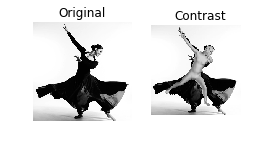

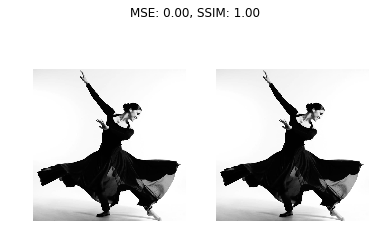

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
#from skimage import data, img_as_float
from skimage.measure import compare_ssim as ssim

def mse(imageA, imageB):
	# the 'Mean Squared Error' between the two images is the
	# sum of the squared difference between the two images;
	# NOTE: the two images must have the same dimension
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	
	# return the MSE, the lower the error, the more "similar"
	# the two images are
	return err
def compare_images(imageA, imageB, title):
	# compute the mean squared error and structural similarity
	# index for the images
	m = mse(imageA, imageB)
	s = ssim(imageA, imageB)
	# setup the figure
	fig = plt.figure(title)
	plt.suptitle("MSE: %.2f, SSIM: %.2f" % (m, s))
	# show first image
	ax = fig.add_subplot(1, 2, 1)
	plt.imshow(imageA, cmap = plt.cm.gray)
	plt.axis("off")
	# show the second image
	ax = fig.add_subplot(1, 2, 2)
	plt.imshow(imageB, cmap = plt.cm.gray)
	plt.axis("off")
	# show the images
	plt.show()
 
# load the images -- the original, the original + contrast,
# and the original + photoshop
original = cv2.imread("/content/kathak.jpg")
contrast = cv2.imread("/content/kath.png")
#shopped = cv2.imread("images/jp_gates_photoshopped.png")
# convert the images to grayscale
original = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
contrast = cv2.cvtColor(contrast, cv2.COLOR_BGR2GRAY)
#shopped = cv2.cvtColor(shopped, cv2.COLOR_BGR2GRAY)

# initialize the figure
fig = plt.figure("Images")
images = ("Original", original), ("Contrast", contrast)
# loop over the images
for (i, (name, image)) in enumerate(images):
	# show the image
	ax = fig.add_subplot(1, 3, i + 1)
	ax.set_title(name)
	plt.imshow(image, cmap = plt.cm.gray)
	plt.axis("off")
# show the figure
plt.show()
# compare the images
compare_images(original, original, "Original vs. Original")
#compare_images(original, contrast, "Input-Output Comparison")
